In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the file
#read the file from the team google drive foler
data = pd.read_csv("/content/drive/My Drive/output.csv")

/tmp/ipython-input-4110902092.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/My Drive/output.csv")


In [ ]:
#view column names
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'],
      dtype='object')>


In [ ]:
#total nan values
total_nans = data.isna().sum()
print(total_nans)

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64


In [ ]:
#head
data.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/01/2023       1:29   BROOKLYN  11230.0  40.621790 -73.970024   
1  12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
2  12/14/2021      16:50     QUEENS  11413.0  40.675884 -73.755770   
3  12/14/2021      23:10     QUEENS  11434.0  40.666840 -73.789410   
4  12/11/2021      19:43      BRONX  10463.0  40.872620 -73.904686   

                 LOCATION         ON STREET NAME CROSS STREET NAME  \
0  (40.62179, -73.970024)          OCEAN PARKWAY          AVENUE K   
1   (40.75144, -73.97397)               3 AVENUE    EAST 43 STREET   
2  (40.675884, -73.75577)  SPRINGFIELD BOULEVARD   EAST GATE PLAZA   
3   (40.66684, -73.78941)   NORTH CONDUIT AVENUE        150 STREET   
4  (40.87262, -73.904686)  WEST KINGSBRIDGE ROAD      HEATH AVENUE   

   NUMBER OF PERSONS INJURED  ...  NUMBER OF PEDESTRIANS KILLED  \
0                        1.0  ...                             0   
1                        0.0  ...                             0   
2                        0.0  ...                             0   
3                        2.0  ...                             0   
4                        1.0  ...                             0   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
0                           1                          0   
1                           0                          0   
2                           0                          0   
3                           2                          0   
4                           1                          0   

    CONTRIBUTING FACTOR VEHICLE 1  CONTRIBUTING FACTOR VEHICLE 2 COLLISION_ID  \
0                     Unspecified                    Unspecified      4675373   
1             Passing Too Closely                    Unspecified      4486519   
2              Turning Improperly                    Unspecified      4487127   
3  Reaction to Uninvolved Vehicle                    Unspecified      4486635   
4                     Unspecified                    Unspecified      4487040   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  
0                                Moped                                Sedan  
1                                Sedan  Station Wagon/Sport Utility Vehicle  
2                                Sedan  Station Wagon/Sport Utility Vehicle  
3                                Sedan                                Sedan  
4  Station Wagon/Sport Utility Vehicle                                Sedan  

[5 rows x 22 columns]

In [ ]:
#thats a lot of lines
data.shape

(934714, 22)

/output.csv

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934714 entries, 0 to 934713
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     934714 non-null  object 
 1   CRASH TIME                     934714 non-null  object 
 2   BOROUGH                        934714 non-null  object 
 3   ZIP CODE                       934714 non-null  object 
 4   LATITUDE                       934714 non-null  float64
 5   LONGITUDE                      934714 non-null  float64
 6   LOCATION                       934714 non-null  object 
 7   ON STREET NAME                 934714 non-null  object 
 8   CROSS STREET NAME              934714 non-null  object 
 9   NUMBER OF PERSONS INJURED      934714 non-null  float64
 10  NUMBER OF PERSONS KILLED       934714 non-null  float64
 11  NUMBER OF PEDESTRIANS INJURED  934714 non-null  int64  
 12  NUMBER OF PEDESTRIANS KILLED  

In [ ]:
data["crash_datetime"] = pd.to_datetime(data["CRASH DATE"] + " " + data["CRASH TIME"])
data["hour"] = data["crash_datetime"].dt.hour
data["day"] = data["crash_datetime"].dt.day
data["month"] = data["crash_datetime"].dt.month
data["year"] = data["crash_datetime"].dt.year
data.head(5)

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/01/2023       1:29   BROOKLYN  11230.0  40.621790 -73.970024   
1  12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
2  12/14/2021      16:50     QUEENS  11413.0  40.675884 -73.755770   
3  12/14/2021      23:10     QUEENS  11434.0  40.666840 -73.789410   
4  12/11/2021      19:43      BRONX  10463.0  40.872620 -73.904686   

                 LOCATION         ON STREET NAME CROSS STREET NAME  \
0  (40.62179, -73.970024)          OCEAN PARKWAY          AVENUE K   
1   (40.75144, -73.97397)               3 AVENUE    EAST 43 STREET   
2  (40.675884, -73.75577)  SPRINGFIELD BOULEVARD   EAST GATE PLAZA   
3   (40.66684, -73.78941)   NORTH CONDUIT AVENUE        150 STREET   
4  (40.87262, -73.904686)  WEST KINGSBRIDGE ROAD      HEATH AVENUE   

   NUMBER OF PERSONS INJURED  ...   CONTRIBUTING FACTOR VEHICLE 1  \
0                        1.0  ...                     Unspecified   
1                        0.0  ...             Passing Too Closely   
2                        0.0  ...              Turning Improperly   
3                        2.0  ...  Reaction to Uninvolved Vehicle   
4                        1.0  ...                     Unspecified   

   CONTRIBUTING FACTOR VEHICLE 2  COLLISION_ID  \
0                    Unspecified       4675373   
1                    Unspecified       4486519   
2                    Unspecified       4487127   
3                    Unspecified       4486635   
4                    Unspecified       4487040   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Moped                                Sedan   
1                                Sedan  Station Wagon/Sport Utility Vehicle   
2                                Sedan  Station Wagon/Sport Utility Vehicle   
3                                Sedan                                Sedan   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

       crash_datetime  hour day month  year  
0 2023-11-01 01:29:00     1   1    11  2023  
1 2021-12-14 14:58:00    14  14    12  2021  
2 2021-12-14 16:50:00    16  14    12  2021  
3 2021-12-14 23:10:00    23  14    12  2021  
4 2021-12-11 19:43:00    19  11    12  2021  

[5 rows x 27 columns]

In [ ]:
data["injury"] = (data["NUMBER OF PERSONS INJURED"]> 0).astype(int)
data["death"] = (data["NUMBER OF PERSONS KILLED"]> 0).astype(int)
data.head(5)

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/01/2023       1:29   BROOKLYN  11230.0  40.621790 -73.970024   
1  12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
2  12/14/2021      16:50     QUEENS  11413.0  40.675884 -73.755770   
3  12/14/2021      23:10     QUEENS  11434.0  40.666840 -73.789410   
4  12/11/2021      19:43      BRONX  10463.0  40.872620 -73.904686   

                 LOCATION         ON STREET NAME CROSS STREET NAME  \
0  (40.62179, -73.970024)          OCEAN PARKWAY          AVENUE K   
1   (40.75144, -73.97397)               3 AVENUE    EAST 43 STREET   
2  (40.675884, -73.75577)  SPRINGFIELD BOULEVARD   EAST GATE PLAZA   
3   (40.66684, -73.78941)   NORTH CONDUIT AVENUE        150 STREET   
4  (40.87262, -73.904686)  WEST KINGSBRIDGE ROAD      HEATH AVENUE   

   NUMBER OF PERSONS INJURED  ...  COLLISION_ID  \
0                        1.0  ...       4675373   
1                        0.0  ...       4486519   
2                        0.0  ...       4487127   
3                        2.0  ...       4486635   
4                        1.0  ...       4487040   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Moped                                Sedan   
1                                Sedan  Station Wagon/Sport Utility Vehicle   
2                                Sedan  Station Wagon/Sport Utility Vehicle   
3                                Sedan                                Sedan   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

       crash_datetime  hour  day  month  year injury  death  
0 2023-11-01 01:29:00     1    1     11  2023      1      0  
1 2021-12-14 14:58:00    14   14     12  2021      0      0  
2 2021-12-14 16:50:00    16   14     12  2021      0      0  
3 2021-12-14 23:10:00    23   14     12  2021      1      0  
4 2021-12-11 19:43:00    19   11     12  2021      1      0  

[5 rows x 29 columns]

In [ ]:
features = ['BOROUGH','ZIP CODE','LATITUDE', 'LONGITUDE','CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','crash_datetime','hour','day','month','year' ]

In [ ]:
injdata = data.dropna(subset=features + ['injury'] )
deddata = data.dropna(subset=features + ['death'] )

In [ ]:
dropcols = ['CRASH TIME', 'CRASH DATE', 'ON STREET NAME', 'CROSS STREET NAME','COLLISION_ID', 'CONTRIBUTING FACTOR VEHICLE 2']
injdata = injdata.drop(columns=dropcols)
deddata = deddata.drop(columns=dropcols)

In [ ]:
deddata.head(5)

BOROUGH ZIP CODE   LATITUDE  LONGITUDE                LOCATION  \
0   BROOKLYN  11230.0  40.621790 -73.970024  (40.62179, -73.970024)   
1  MANHATTAN  10017.0  40.751440 -73.973970   (40.75144, -73.97397)   
2     QUEENS  11413.0  40.675884 -73.755770  (40.675884, -73.75577)   
3     QUEENS  11434.0  40.666840 -73.789410   (40.66684, -73.78941)   
4      BRONX  10463.0  40.872620 -73.904686  (40.87262, -73.904686)   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        1.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        2.0                       0.0   
4                        1.0                       0.0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   NUMBER OF CYCLIST INJURED  ...   CONTRIBUTING FACTOR VEHICLE 1  \
0                          0  ...                     Unspecified   
1                          0  ...             Passing Too Closely   
2                          0  ...              Turning Improperly   
3                          0  ...  Reaction to Uninvolved Vehicle   
4                          0  ...                     Unspecified   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Moped                                Sedan   
1                                Sedan  Station Wagon/Sport Utility Vehicle   
2                                Sedan  Station Wagon/Sport Utility Vehicle   
3                                Sedan                                Sedan   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

       crash_datetime hour day month  year  injury  death  
0 2023-11-01 01:29:00    1   1    11  2023       1      0  
1 2021-12-14 14:58:00   14  14    12  2021       0      0  
2 2021-12-14 16:50:00   16  14    12  2021       0      0  
3 2021-12-14 23:10:00   23  14    12  2021       1      0  
4 2021-12-11 19:43:00   19  11    12  2021       1      0  

[5 rows x 23 columns]

In [ ]:
categorical_features = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','BOROUGH','ZIP CODE']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
injdata.head(5)

BOROUGH ZIP CODE   LATITUDE  LONGITUDE                LOCATION  \
0   BROOKLYN  11230.0  40.621790 -73.970024  (40.62179, -73.970024)   
1  MANHATTAN  10017.0  40.751440 -73.973970   (40.75144, -73.97397)   
2     QUEENS  11413.0  40.675884 -73.755770  (40.675884, -73.75577)   
3     QUEENS  11434.0  40.666840 -73.789410   (40.66684, -73.78941)   
4      BRONX  10463.0  40.872620 -73.904686  (40.87262, -73.904686)   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                        1.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        2.0                       0.0   
4                        1.0                       0.0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   NUMBER OF CYCLIST INJURED  ...   CONTRIBUTING FACTOR VEHICLE 1  \
0                          0  ...                     Unspecified   
1                          0  ...             Passing Too Closely   
2                          0  ...              Turning Improperly   
3                          0  ...  Reaction to Uninvolved Vehicle   
4                          0  ...                     Unspecified   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Moped                                Sedan   
1                                Sedan  Station Wagon/Sport Utility Vehicle   
2                                Sedan  Station Wagon/Sport Utility Vehicle   
3                                Sedan                                Sedan   
4  Station Wagon/Sport Utility Vehicle                                Sedan   

       crash_datetime hour day month  year  injury  death  
0 2023-11-01 01:29:00    1   1    11  2023       1      0  
1 2021-12-14 14:58:00   14  14    12  2021       0      0  
2 2021-12-14 16:50:00   16  14    12  2021       0      0  
3 2021-12-14 23:10:00   23  14    12  2021       1      0  
4 2021-12-11 19:43:00   19  11    12  2021       1      0  

[5 rows x 23 columns]

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934714 entries, 0 to 934713
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     934714 non-null  object        
 1   CRASH TIME                     934714 non-null  object        
 2   BOROUGH                        934714 non-null  object        
 3   ZIP CODE                       934714 non-null  object        
 4   LATITUDE                       934714 non-null  float64       
 5   LONGITUDE                      934714 non-null  float64       
 6   LOCATION                       934714 non-null  object        
 7   ON STREET NAME                 934714 non-null  object        
 8   CROSS STREET NAME              934714 non-null  object        
 9   NUMBER OF PERSONS INJURED      934714 non-null  float64       
 10  NUMBER OF PERSONS KILLED       934714 non-null  float64       
 11  

In [ ]:
# Define features and target
numerical_features = ['LATITUDE', 'LONGITUDE', 'hour', 'day', 'month', 'year']
categorical_features_for_X = ['BOROUGH','ZIP CODE','CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

# Convert 'ZIP CODE' to string type to ensure uniform type for OneHotEncoder
data['ZIP CODE'] = data['ZIP CODE'].astype(str)

all_features_for_model = numerical_features + categorical_features_for_X

X = data[all_features_for_model]
y = data["injury"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

# The categorical_features for the preprocessor are already defined

# Combine preprocessor and classifier into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1,
        class_weight="balanced",  # helps if injuries are rare
        random_state=42
    ))
])

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CONTRIBUTING FACTOR '
                                                   'VEHICLE 1',
                                                   'VEHICLE TYPE CODE 1',
                                                   'VEHICLE TYPE CODE 2',
                                                   'BOROUGH', 'ZIP CODE'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

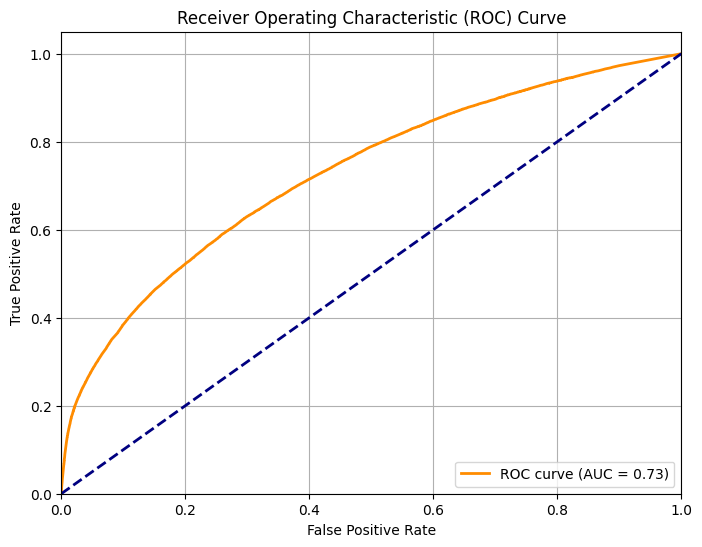

AUC (Area Under the Curve): 0.73


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (inj = 1)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

In [ ]:
# Get feature importances from the trained Random Forest Classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Get feature names after one-hot encoding
# The preprocessor's get_feature_names_out() method will give us the names of the columns after transformation
transformed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': transformed_features,
    'importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top N most important features
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))


Top 20 Most Important Features:
                                                feature  importance
837                    cat__VEHICLE TYPE CODE 2_BICYCLE    0.056890
857                       cat__VEHICLE TYPE CODE 2_Bike    0.050907
1509                   cat__VEHICLE TYPE CODE 2_UNKNOWN    0.029111
1756                             cat__BOROUGH_MANHATTAN    0.018685
1298         cat__VEHICLE TYPE CODE 2_PASSENGER VEHICLE    0.018145
5     cat__CONTRIBUTING FACTOR VEHICLE 1_Backing Uns...    0.017017
529                      cat__VEHICLE TYPE CODE 1_Sedan    0.016800
51    cat__CONTRIBUTING FACTOR VEHICLE 1_Traffic Con...    0.016619
416          cat__VEHICLE TYPE CODE 1_PASSENGER VEHICLE    0.015941
55       cat__CONTRIBUTING FACTOR VEHICLE 1_Unspecified    0.015593
119                       cat__VEHICLE TYPE CODE 1_Bike    0.013100
541   cat__VEHICLE TYPE CODE 1_Station Wagon/Sport U...    0.012944
10    cat__CONTRIBUTING FACTOR VEHICLE 1_Driver Inat...    0.012308
1424            

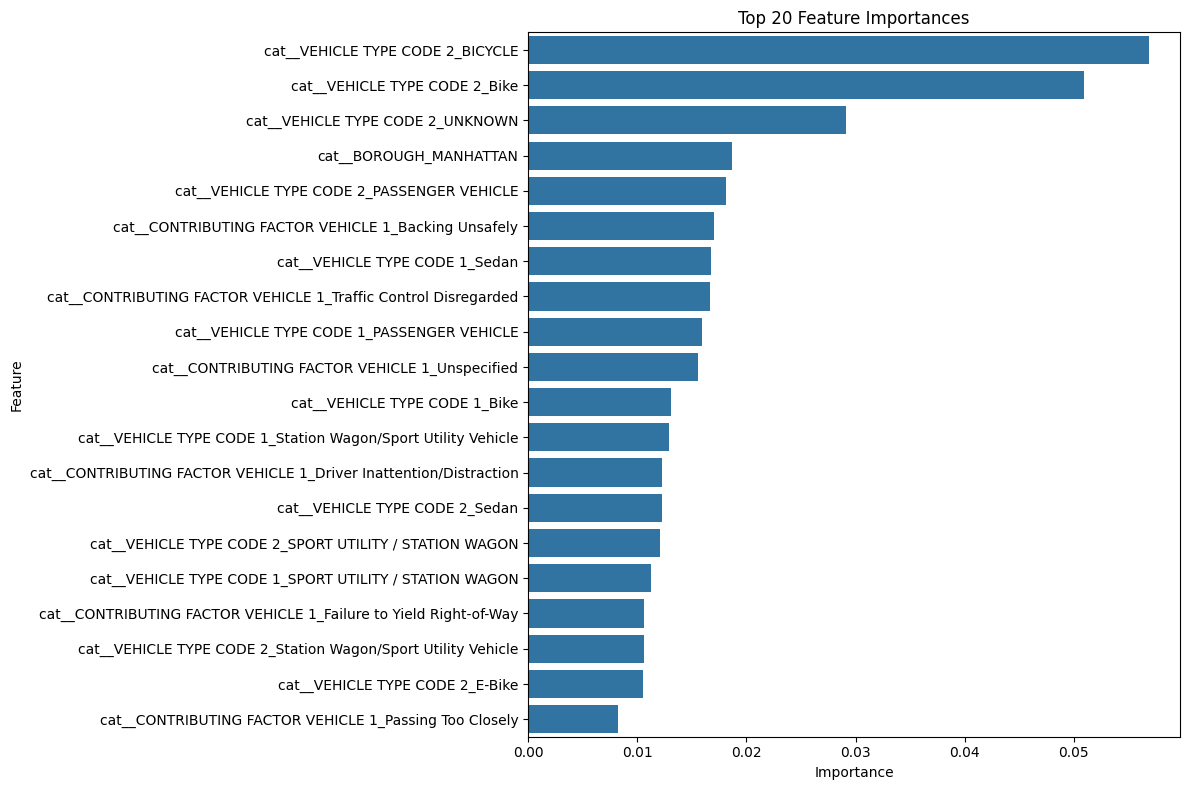

In [ ]:
# Visualize the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7233488282524619
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.81    148369
           1       0.38      0.56      0.46     38574

    accuracy                           0.72    186943
   macro avg       0.63      0.66      0.64    186943
weighted avg       0.77      0.72      0.74    186943

Confusion Matrix:
[[113538  34831]
 [ 16887  21687]]


In [ ]:
#read in the geodata
import geopandas as gpd

nyc_zip_geo = gpd.read_file("/content/drive/My Drive/nyc_zip.geojson")
nyc_zip_geo.head()

OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         2      11004        Glen Oaks    NY  Queens      36      081   
2         3      11040    New Hyde Park    NY  Queens      36      081   
3         4      11426        Bellerose    NY  Queens      36      081   
4         5      11365    Fresh Meadows    NY  Queens      36      081   

   BLDGpostalCode    Shape_Leng    Shape_Area  \
0               0  20624.692317  2.016328e+07   
1               0  23002.816039  2.260653e+07   
2               0  15749.161511  6.269333e+06   
3               0  35932.810639  4.941836e+07   
4               0  38693.565676  6.938587e+07   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/PostalCode...   
1  http://nyc.pediacities.com/Resource/PostalCode...   
2  http://nyc.pediacities.com/Resource/PostalCode...   
3  http://nyc.pediacities.com/Resource/PostalCode...   
4  http://nyc.pediacities.com/Resource/PostalCode...   

                                            geometry  
0  POLYGON ((-73.86942 40.74916, -73.89507 40.746...  
1  POLYGON ((-73.71068 40.75004, -73.70869 40.748...  
2  POLYGON ((-73.70098 40.7389, -73.70309 40.7445...  
3  POLYGON ((-73.7227 40.75373, -73.72251 40.7533...  
4  POLYGON ((-73.81089 40.72717, -73.81116 40.728...

In [ ]:
data['predicted_injury_proba'] = pipeline.predict_proba(data[all_features_for_model])[:, 1]
data.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/01/2023       1:29   BROOKLYN  11230.0  40.621790 -73.970024   
1  12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
2  12/14/2021      16:50     QUEENS  11413.0  40.675884 -73.755770   
3  12/14/2021      23:10     QUEENS  11434.0  40.666840 -73.789410   
4  12/11/2021      19:43      BRONX  10463.0  40.872620 -73.904686   

                 LOCATION         ON STREET NAME CROSS STREET NAME  \
0  (40.62179, -73.970024)          OCEAN PARKWAY          AVENUE K   
1   (40.75144, -73.97397)               3 AVENUE    EAST 43 STREET   
2  (40.675884, -73.75577)  SPRINGFIELD BOULEVARD   EAST GATE PLAZA   
3   (40.66684, -73.78941)   NORTH CONDUIT AVENUE        150 STREET   
4  (40.87262, -73.904686)  WEST KINGSBRIDGE ROAD      HEATH AVENUE   

   NUMBER OF PERSONS INJURED  ...                  VEHICLE TYPE CODE 1  \
0                        1.0  ...                                Moped   
1                        0.0  ...                                Sedan   
2                        0.0  ...                                Sedan   
3                        2.0  ...                                Sedan   
4                        1.0  ...  Station Wagon/Sport Utility Vehicle   

                   VEHICLE TYPE CODE 2      crash_datetime  hour  day  month  \
0                                Sedan 2023-11-01 01:29:00     1    1     11   
1  Station Wagon/Sport Utility Vehicle 2021-12-14 14:58:00    14   14     12   
2  Station Wagon/Sport Utility Vehicle 2021-12-14 16:50:00    16   14     12   
3                                Sedan 2021-12-14 23:10:00    23   14     12   
4                                Sedan 2021-12-11 19:43:00    19   11     12   

   year injury death  predicted_injury_proba  
0  2023      1     0                0.885814  
1  2021      0     0                0.000000  
2  2021      0     0                0.728226  
3  2021      1     0                0.555592  
4  2021      1     0                0.441347  

[5 rows x 30 columns]

In [ ]:
#aggregate predicted injury prob by zip to merge w/ geospatial
average_injury_proba_by_zip = data.groupby('ZIP CODE')['predicted_injury_proba'].mean().reset_index()
average_injury_proba_by_zip['ZIP CODE'] = average_injury_proba_by_zip['ZIP CODE'].astype(str).str.replace(r'\.0', '', regex=True)
average_injury_proba_by_zip.head()

ZIP CODE  predicted_injury_proba
0                         0.150231
1    10000                0.343289
2    10000                0.376995
3    10001                0.130665
4    10001                0.175937

from matplotlib import pyplot as plt
_df_0['predicted_injury_proba'].plot(kind='hist', bins=20, title='predicted_injury_proba')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ZIP CODE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['predicted_injury_proba'].plot(kind='line', figsize=(8, 4), title='predicted_injury_proba')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['ZIP CODE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='predicted_injury_proba', y='ZIP CODE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# merge to nyc geo data - avg inj prob per zip
nyc_zip_geo['postalCode'] = nyc_zip_geo['postalCode'].astype(str)
merged_data = nyc_zip_geo.merge(average_injury_proba_by_zip, left_on='postalCode', right_on='ZIP CODE', how='left')
merged_data.head()

OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         1      11372  Jackson Heights    NY  Queens      36      081   
2         2      11004        Glen Oaks    NY  Queens      36      081   
3         2      11004        Glen Oaks    NY  Queens      36      081   
4         3      11040    New Hyde Park    NY  Queens      36      081   

   BLDGpostalCode    Shape_Leng    Shape_Area  \
0               0  20624.692317  2.016328e+07   
1               0  20624.692317  2.016328e+07   
2               0  23002.816039  2.260653e+07   
3               0  23002.816039  2.260653e+07   
4               0  15749.161511  6.269333e+06   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/PostalCode...   
1  http://nyc.pediacities.com/Resource/PostalCode...   
2  http://nyc.pediacities.com/Resource/PostalCode...   
3  http://nyc.pediacities.com/Resource/PostalCode...   
4  http://nyc.pediacities.com/Resource/PostalCode...   

                                            geometry ZIP CODE  \
0  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
1  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
2  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   
3  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   
4  POLYGON ((-73.70098 40.7389, -73.70309 40.7445...    11040   

   predicted_injury_proba  
0                0.285846  
1                0.419233  
2                0.349410  
3                0.455912  
4                0.346403

In [ ]:
#Group data by zip for total # crash counts
total_crashes_by_zip = data.groupby('ZIP CODE').size().reset_index(name='total_crashes')
total_crashes_by_zip['ZIP CODE'] = total_crashes_by_zip['ZIP CODE'].astype(str).str.replace(r'\.0$', '', regex=True)
total_crashes_by_zip.head()

ZIP CODE  total_crashes
0                      39
1    10000              3
2    10000             45
3    10001           4344
4    10001           6225

In [ ]:
# merge crash counts to prob and zip data
merged_data = merged_data.merge(total_crashes_by_zip, left_on='ZIP CODE', right_on='ZIP CODE', how='left')
merged_data.head()

OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         1      11372  Jackson Heights    NY  Queens      36      081   
2         1      11372  Jackson Heights    NY  Queens      36      081   
3         1      11372  Jackson Heights    NY  Queens      36      081   
4         2      11004        Glen Oaks    NY  Queens      36      081   

   BLDGpostalCode    Shape_Leng    Shape_Area  \
0               0  20624.692317  2.016328e+07   
1               0  20624.692317  2.016328e+07   
2               0  20624.692317  2.016328e+07   
3               0  20624.692317  2.016328e+07   
4               0  23002.816039  2.260653e+07   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/PostalCode...   
1  http://nyc.pediacities.com/Resource/PostalCode...   
2  http://nyc.pediacities.com/Resource/PostalCode...   
3  http://nyc.pediacities.com/Resource/PostalCode...   
4  http://nyc.pediacities.com/Resource/PostalCode...   

                                            geometry ZIP CODE  \
0  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
1  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
2  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
3  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
4  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   

   predicted_injury_proba  total_crashes  
0                0.285846         2444.0  
1                0.285846         3986.0  
2                0.419233         2444.0  
3                0.419233         3986.0  
4                0.349410          696.0

In [ ]:
#map all three with hover to display those prob, # crash, zip
import folium

# Fill NaN values with 0 for pred inj in zip codes without crash data
merged_data['predicted_injury_proba'] = merged_data['predicted_injury_proba'].fillna(0)
# Fill NaN values  with 0 for crashes total in zip codes without crash data
merged_data['total_crashes'] = merged_data['total_crashes'].fillna(0)


m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add the choropleth layer
choropleth = folium.Choropleth(
    geo_data=merged_data,
    name='Predicted Injury Probability',
    data=merged_data,
    columns=['postalCode', 'predicted_injury_proba'],
    key_on='feature.properties.postalCode',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Predicted Injury Probability per ZIP Code',
    highlight=True
).add_to(m)

# Add  hover tooltips to display avg prob zip # crashes
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(
    fields=['postalCode', 'predicted_injury_proba', 'total_crashes'],
    aliases=['ZIP Code:', 'Avg Predicted Injury Probability:', 'Total Crashes:'],
    localize=True,
    sticky=False,
    labels=True,
    style='''
        background-color: #F0EFE9;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    ''',
    max_width=800
))

folium.LayerControl().add_to(m)

# show map
m

In [ ]:
#data for next 20 predictions
X_test_subset = X_test.head(20)
y_test_subset = y_test.head(20)

print("Shape of X_test_subset:", X_test_subset.shape)
print("Shape of y_test_subset:", y_test_subset.shape)
print("X_test_subset head:\n", X_test_subset.head())
print("y_test_subset head:\n", y_test_subset.head())

Shape of X_test_subset: (20, 11)
Shape of y_test_subset: (20,)
X_test_subset head:
          LATITUDE  LONGITUDE  hour  day  month  year    BOROUGH ZIP CODE  \
687422  40.759620 -73.961965     0   27      1  2014  MANHATTAN  10022.0   
528184  40.693705 -73.905044    18   15      4  2015   BROOKLYN    11237   
902526  40.676342 -73.910934    12   11      8  2024   BROOKLYN    11233   
68116   40.717278 -73.995440    17   11      9  2023  MANHATTAN  10013.0   
318615  40.853813 -73.907340    10    5      5  2017      BRONX  10453.0   

         CONTRIBUTING FACTOR VEHICLE 1                  VEHICLE TYPE CODE 1  \
687422                     Unspecified        SPORT UTILITY / STATION WAGON   
528184                     Unspecified                    PASSENGER VEHICLE   
902526                     Unspecified                                Sedan   
68116   Driver Inattention/Distraction                                Sedan   
318615                     Unspecified  Station Wagon/Sport Util

In [ ]:
#predicting next 20 - including predictor values
y_pred_subset = pipeline.predict(X_test_subset)
y_pred_proba_subset = pipeline.predict_proba(X_test_subset)[:, 1]

# Create a DataFrame to display the results
results_df = X_test_subset.copy()
results_df['Actual_Injury'] = y_test_subset
results_df['Predicted_Injury'] = y_pred_subset
results_df['Predicted_Injury_Probability'] = y_pred_proba_subset

print("Comparison of Actual vs. Predicted Injury Status and Probability for the first 20 test records:")
print(results_df.head(20))

Comparison of Actual vs. Predicted Injury Status and Probability for the first 20 test records:
         LATITUDE  LONGITUDE  hour  day  month  year    BOROUGH ZIP CODE  \
687422  40.759620 -73.961965     0   27      1  2014  MANHATTAN  10022.0   
528184  40.693705 -73.905044    18   15      4  2015   BROOKLYN    11237   
902526  40.676342 -73.910934    12   11      8  2024   BROOKLYN    11233   
68116   40.717278 -73.995440    17   11      9  2023  MANHATTAN  10013.0   
318615  40.853813 -73.907340    10    5      5  2017      BRONX  10453.0   
49969   40.801330 -73.950195    13   18     11  2022  MANHATTAN  10026.0   
764997  40.709328 -73.955887    15   25      6  2013   BROOKLYN  11211.0   
244342  40.688680 -73.837234     9   16      5  2018     QUEENS  11416.0   
510970  40.705310 -74.009028    12   29      4  2015  MANHATTAN  10005.0   
454718  40.639987 -73.948413    16   23     10  2015   BROOKLYN  11226.0   
605262  40.822836 -73.941916    17   17      9  2014  MANHATTAN    1

In [ ]:
#hyperparameters for RF
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
} # This died so many times, I will re-evaluate how to complete hyperparameter tuning

In [ ]:
# run pipeline through those hyperparameters - choose best model from roc_auc, acc
from sklearn.model_selection import RandomizedSearchCV

# randomized search cv
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,  # parameters
    scoring='roc_auc',
    cv=3,       # 3 fold cv
    random_state=42,
    n_jobs=-1   # use all processors - my laptop died
)

# fit to training data
random_search.fit(X_train, y_train)


print(f"Best ROC AUC Score: {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best ROC AUC Score: 0.7538
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 10, 'classifier__max_depth': 20}


Best Model Accuracy: 0.6855

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78    148369
           1       0.36      0.68      0.47     38574

    accuracy                           0.69    186943
   macro avg       0.63      0.68      0.62    186943
weighted avg       0.78      0.69      0.71    186943


Best Model Confusion Matrix:
[[101995  46374]
 [ 12414  26160]]

Best Model AUC: 0.7561


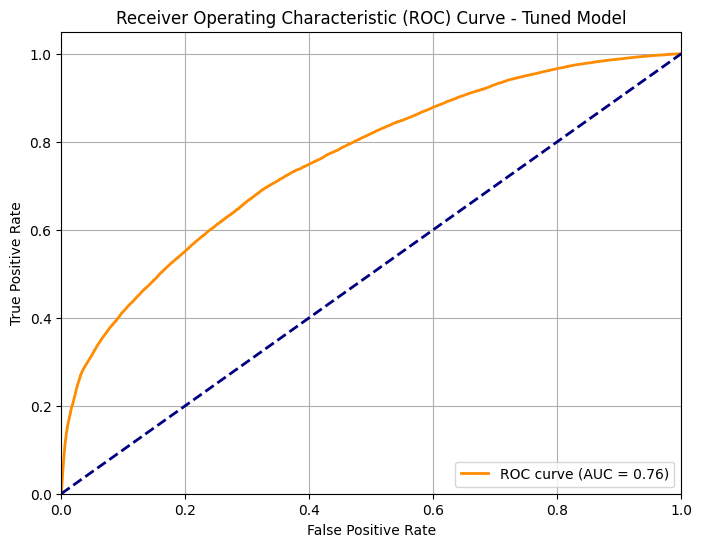

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# best pipe
best_pipeline = random_search.best_estimator_

# test preds
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# eval metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# calculate roc and auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Best Model Accuracy: {accuracy:.4f}")
print("\nBest Model Classification Report:")
print(report)
print("\nBest Model Confusion Matrix:")
print(conf_matrix)
print(f"\nBest Model AUC: {roc_auc:.4f}")

# plot roc and auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X_test_subset = X_test.head(20)
y_test_subset = y_test.head(20)

print("Shape of X_test_subset:", X_test_subset.shape)
print("Shape of y_test_subset:", y_test_subset.shape)
print("X_test_subset head:\n", X_test_subset.head())
print("y_test_subset head:\n", y_test_subset.head())

Shape of X_test_subset: (20, 11)
Shape of y_test_subset: (20,)
X_test_subset head:
          LATITUDE  LONGITUDE  hour  day  month  year    BOROUGH ZIP CODE  \
687422  40.759620 -73.961965     0   27      1  2014  MANHATTAN  10022.0   
528184  40.693705 -73.905044    18   15      4  2015   BROOKLYN    11237   
902526  40.676342 -73.910934    12   11      8  2024   BROOKLYN    11233   
68116   40.717278 -73.995440    17   11      9  2023  MANHATTAN  10013.0   
318615  40.853813 -73.907340    10    5      5  2017      BRONX  10453.0   

         CONTRIBUTING FACTOR VEHICLE 1                  VEHICLE TYPE CODE 1  \
687422                     Unspecified        SPORT UTILITY / STATION WAGON   
528184                     Unspecified                    PASSENGER VEHICLE   
902526                     Unspecified                                Sedan   
68116   Driver Inattention/Distraction                                Sedan   
318615                     Unspecified  Station Wagon/Sport Util

In [ ]:
y_pred_subset = pipeline.predict(X_test_subset)
y_pred_proba_subset = pipeline.predict_proba(X_test_subset)[:, 1]


results_df = X_test_subset.copy()
results_df['Actual_Injury'] = y_test_subset
results_df['Predicted_Injury'] = y_pred_subset
results_df['Predicted_Injury_Probability'] = y_pred_proba_subset

print("Comparison of Actual vs. Predicted Injury Status and Probability for the first 20 test records:")
print(results_df.head(20))

Comparison of Actual vs. Predicted Injury Status and Probability for the first 20 test records:
         LATITUDE  LONGITUDE  hour  day  month  year    BOROUGH ZIP CODE  \
687422  40.759620 -73.961965     0   27      1  2014  MANHATTAN  10022.0   
528184  40.693705 -73.905044    18   15      4  2015   BROOKLYN    11237   
902526  40.676342 -73.910934    12   11      8  2024   BROOKLYN    11233   
68116   40.717278 -73.995440    17   11      9  2023  MANHATTAN  10013.0   
318615  40.853813 -73.907340    10    5      5  2017      BRONX  10453.0   
49969   40.801330 -73.950195    13   18     11  2022  MANHATTAN  10026.0   
764997  40.709328 -73.955887    15   25      6  2013   BROOKLYN  11211.0   
244342  40.688680 -73.837234     9   16      5  2018     QUEENS  11416.0   
510970  40.705310 -74.009028    12   29      4  2015  MANHATTAN  10005.0   
454718  40.639987 -73.948413    16   23     10  2015   BROOKLYN  11226.0   
605262  40.822836 -73.941916    17   17      9  2014  MANHATTAN    1

In [ ]:
data['predicted_injury_proba_best_model'] = best_pipeline.predict_proba(data[all_features_for_model])[:, 1]
data.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/01/2023       1:29   BROOKLYN  11230.0  40.621790 -73.970024   
1  12/14/2021      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
2  12/14/2021      16:50     QUEENS  11413.0  40.675884 -73.755770   
3  12/14/2021      23:10     QUEENS  11434.0  40.666840 -73.789410   
4  12/11/2021      19:43      BRONX  10463.0  40.872620 -73.904686   

                 LOCATION         ON STREET NAME CROSS STREET NAME  \
0  (40.62179, -73.970024)          OCEAN PARKWAY          AVENUE K   
1   (40.75144, -73.97397)               3 AVENUE    EAST 43 STREET   
2  (40.675884, -73.75577)  SPRINGFIELD BOULEVARD   EAST GATE PLAZA   
3   (40.66684, -73.78941)   NORTH CONDUIT AVENUE        150 STREET   
4  (40.87262, -73.904686)  WEST KINGSBRIDGE ROAD      HEATH AVENUE   

   NUMBER OF PERSONS INJURED  ...                  VEHICLE TYPE CODE 2  \
0                        1.0  ...                                Sedan   
1                        0.0  ...  Station Wagon/Sport Utility Vehicle   
2                        0.0  ...  Station Wagon/Sport Utility Vehicle   
3                        2.0  ...                                Sedan   
4                        1.0  ...                                Sedan   

       crash_datetime  hour  day  month  year  injury death  \
0 2023-11-01 01:29:00     1    1     11  2023       1     0   
1 2021-12-14 14:58:00    14   14     12  2021       0     0   
2 2021-12-14 16:50:00    16   14     12  2021       0     0   
3 2021-12-14 23:10:00    23   14     12  2021       1     0   
4 2021-12-11 19:43:00    19   11     12  2021       1     0   

  predicted_injury_proba  predicted_injury_proba_best_model  
0               0.885814                           0.603123  
1               0.000000                           0.408888  
2               0.728226                           0.560328  
3               0.555592                           0.565987  
4               0.441347                           0.540147  

[5 rows x 31 columns]

In [ ]:
average_injury_proba_best_model_by_zip = data.groupby('ZIP CODE')['predicted_injury_proba_best_model'].mean().reset_index()
average_injury_proba_best_model_by_zip['ZIP CODE'] = average_injury_proba_best_model_by_zip['ZIP CODE'].astype(str).str.replace(r'\.0', '', regex=True)
average_injury_proba_best_model_by_zip.head()

ZIP CODE  predicted_injury_proba_best_model
0                                    0.430191
1    10000                           0.439081
2    10000                           0.574426
3    10001                           0.349232
4    10001                           0.416291

In [ ]:
nyc_zip_geo['postalCode'] = nyc_zip_geo['postalCode'].astype(str)
merged_data_best_model = nyc_zip_geo.merge(average_injury_proba_best_model_by_zip, left_on='postalCode', right_on='ZIP CODE', how='left')
merged_data_best_model.head()

OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         1      11372  Jackson Heights    NY  Queens      36      081   
2         2      11004        Glen Oaks    NY  Queens      36      081   
3         2      11004        Glen Oaks    NY  Queens      36      081   
4         3      11040    New Hyde Park    NY  Queens      36      081   

   BLDGpostalCode    Shape_Leng    Shape_Area  \
0               0  20624.692317  2.016328e+07   
1               0  20624.692317  2.016328e+07   
2               0  23002.816039  2.260653e+07   
3               0  23002.816039  2.260653e+07   
4               0  15749.161511  6.269333e+06   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/PostalCode...   
1  http://nyc.pediacities.com/Resource/PostalCode...   
2  http://nyc.pediacities.com/Resource/PostalCode...   
3  http://nyc.pediacities.com/Resource/PostalCode...   
4  http://nyc.pediacities.com/Resource/PostalCode...   

                                            geometry ZIP CODE  \
0  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
1  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
2  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   
3  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   
4  POLYGON ((-73.70098 40.7389, -73.70309 40.7445...    11040   

   predicted_injury_proba_best_model  
0                           0.427629  
1                           0.522665  
2                           0.425401  
3                           0.518021  
4                           0.421742

In [ ]:
merged_data_best_model = merged_data_best_model.merge(total_crashes_by_zip, left_on='ZIP CODE', right_on='ZIP CODE', how='left')
merged_data_best_model.head()

OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         1      11372  Jackson Heights    NY  Queens      36      081   
2         1      11372  Jackson Heights    NY  Queens      36      081   
3         1      11372  Jackson Heights    NY  Queens      36      081   
4         2      11004        Glen Oaks    NY  Queens      36      081   

   BLDGpostalCode    Shape_Leng    Shape_Area  \
0               0  20624.692317  2.016328e+07   
1               0  20624.692317  2.016328e+07   
2               0  20624.692317  2.016328e+07   
3               0  20624.692317  2.016328e+07   
4               0  23002.816039  2.260653e+07   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/PostalCode...   
1  http://nyc.pediacities.com/Resource/PostalCode...   
2  http://nyc.pediacities.com/Resource/PostalCode...   
3  http://nyc.pediacities.com/Resource/PostalCode...   
4  http://nyc.pediacities.com/Resource/PostalCode...   

                                            geometry ZIP CODE  \
0  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
1  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
2  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
3  POLYGON ((-73.86942 40.74916, -73.89507 40.746...    11372   
4  POLYGON ((-73.71068 40.75004, -73.70869 40.748...    11004   

   predicted_injury_proba_best_model  total_crashes  
0                           0.427629         2444.0  
1                           0.427629         3986.0  
2                           0.522665         2444.0  
3                           0.522665         3986.0  
4                           0.425401          696.0

In [ ]:
import folium
from branca.colormap import LinearColormap

# nan to 0
merged_data_best_model['predicted_injury_proba_best_model'] = merged_data_best_model['predicted_injury_proba_best_model'].fillna(0)
# nan to 0
merged_data_best_model['total_crashes'] = merged_data_best_model['total_crashes'].fillna(0)

# nyc
m_best_model = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# pred injury prob
min_proba = merged_data_best_model['predicted_injury_proba_best_model'].min()
max_proba = merged_data_best_model['predicted_injury_proba_best_model'].max()
colormap = LinearColormap(['yellow', 'orange', 'red'], vmin=min_proba, vmax=max_proba)
m_best_model.add_child(colormap)

# chloro
choropleth_best_model = folium.Choropleth(
    geo_data=merged_data_best_model,
    name='Predicted Injury Probability (Best Model)',
    data=merged_data_best_model,
    columns=['postalCode', 'predicted_injury_proba_best_model'],
    key_on='feature.properties.postalCode',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Predicted Injury Probability per ZIP Code (Best Model)',
    highlight=True
).add_to(m_best_model)

# add hover tooltip
choropleth_best_model.geojson.add_child(folium.features.GeoJsonTooltip(
    fields=['postalCode', 'predicted_injury_proba_best_model', 'total_crashes'],
    aliases=['ZIP Code:', 'Avg Predicted Injury Probability (Best Model):', 'Total Crashes:'],
    localize=True,
    sticky=False,
    labels=True,
    style='''
        background-color: #F0EFE9;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    ''',
    max_width=800
))

folium.LayerControl().add_to(m_best_model)

# show map
m_best_model

In [ ]:
# get feature importance from best model
best_feature_importances = best_pipeline.named_steps['classifier'].feature_importances_

# get feature names from best model
best_transformed_features = best_pipeline.named_steps['preprocessor'].get_feature_names_out()


best_feature_importance_df = pd.DataFrame({
    'feature': best_transformed_features,
    'importance': best_feature_importances
})

# sort
best_feature_importance_df = best_feature_importance_df.sort_values(by='importance', ascending=False)

# show top 20 features
print("Top 20 Most Important Features for Best Model:")
print(best_feature_importance_df.head(20))

Top 20 Most Important Features for Best Model:
                                                feature  importance
857                       cat__VEHICLE TYPE CODE 2_Bike    0.118204
837                    cat__VEHICLE TYPE CODE 2_BICYCLE    0.102883
1509                   cat__VEHICLE TYPE CODE 2_UNKNOWN    0.076451
1756                             cat__BOROUGH_MANHATTAN    0.051631
529                      cat__VEHICLE TYPE CODE 1_Sedan    0.040524
1298         cat__VEHICLE TYPE CODE 2_PASSENGER VEHICLE    0.038724
416          cat__VEHICLE TYPE CODE 1_PASSENGER VEHICLE    0.034682
51    cat__CONTRIBUTING FACTOR VEHICLE 1_Traffic Con...    0.034057
5     cat__CONTRIBUTING FACTOR VEHICLE 1_Backing Uns...    0.033654
541   cat__VEHICLE TYPE CODE 1_Station Wagon/Sport U...    0.026771
119                       cat__VEHICLE TYPE CODE 1_Bike    0.025529
979                     cat__VEHICLE TYPE CODE 2_E-Bike    0.024284
505   cat__VEHICLE TYPE CODE 1_SPORT UTILITY / STATI...    0.021855
1

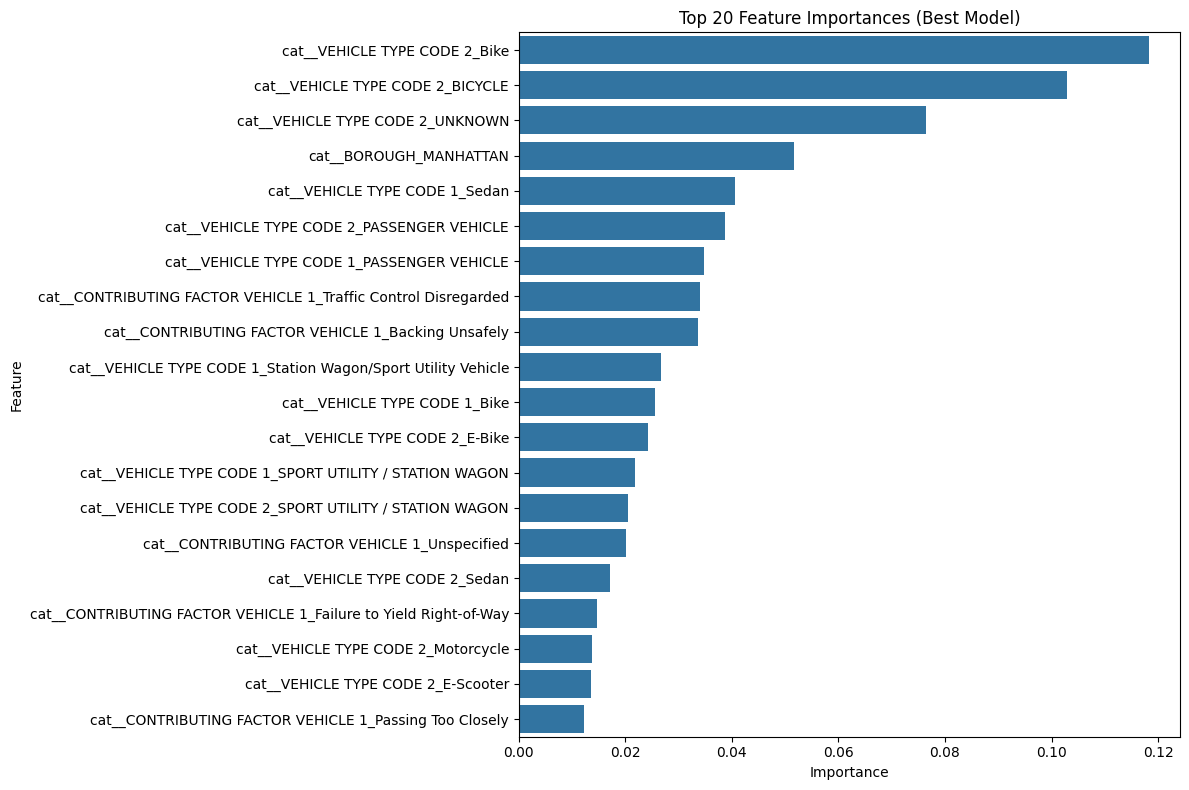

In [ ]:
# graph top 20 feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=best_feature_importance_df.head(20))
plt.title('Top 20 Feature Importances (Best Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_best_model_subset = best_pipeline.predict(X_test_subset)
y_pred_proba_best_model_subset = best_pipeline.predict_proba(X_test_subset)[:, 1]

# best model actual v predicted
results_df_best_model = X_test_subset.copy()
results_df_best_model['Actual_Injury'] = y_test_subset
results_df_best_model['Predicted_Injury_Best_Model'] = y_pred_best_model_subset
results_df_best_model['Predicted_Injury_Probability_Best_Model'] = y_pred_proba_best_model_subset

print("Comparison of Actual vs. Predicted Injury Status and Probability (Best Model) for the first 20 test records:")
print(results_df_best_model.head(20))

Comparison of Actual vs. Predicted Injury Status and Probability (Best Model) for the first 20 test records:
         LATITUDE  LONGITUDE  hour  day  month  year    BOROUGH ZIP CODE  \
687422  40.759620 -73.961965     0   27      1  2014  MANHATTAN  10022.0   
528184  40.693705 -73.905044    18   15      4  2015   BROOKLYN    11237   
902526  40.676342 -73.910934    12   11      8  2024   BROOKLYN    11233   
68116   40.717278 -73.995440    17   11      9  2023  MANHATTAN  10013.0   
318615  40.853813 -73.907340    10    5      5  2017      BRONX  10453.0   
49969   40.801330 -73.950195    13   18     11  2022  MANHATTAN  10026.0   
764997  40.709328 -73.955887    15   25      6  2013   BROOKLYN  11211.0   
244342  40.688680 -73.837234     9   16      5  2018     QUEENS  11416.0   
510970  40.705310 -74.009028    12   29      4  2015  MANHATTAN  10005.0   
454718  40.639987 -73.948413    16   23     10  2015   BROOKLYN  11226.0   
605262  40.822836 -73.941916    17   17      9  2014  M

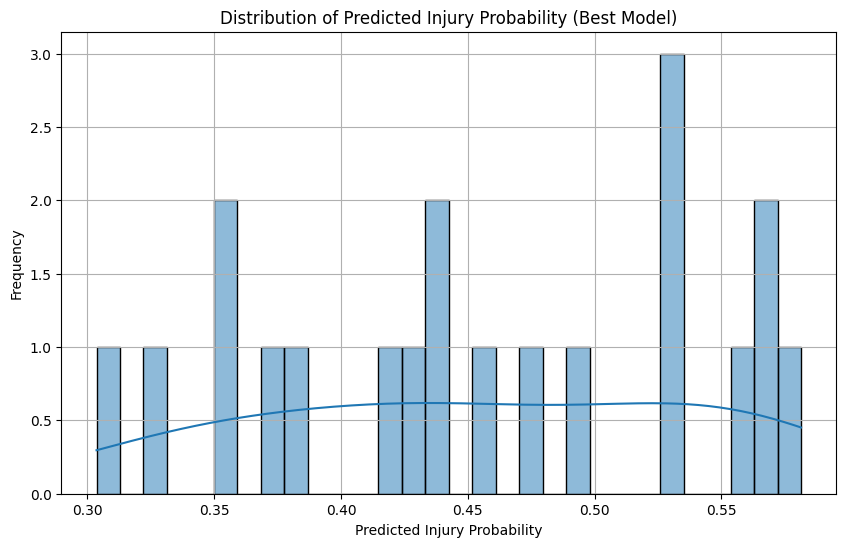

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot best model distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_df_best_model['Predicted_Injury_Probability_Best_Model'], bins=30, kde=True)
plt.title('Distribution of Predicted Injury Probability (Best Model)')
plt.xlabel('Predicted Injury Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()